In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [41]:
fname = 'ForRod_FBIExcel.csv'
df = pd.read_csv(fname)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [42]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [43]:
df['Robbery_New'] = np.where(df['Robbery'] >0, 1,0)

In [44]:
df['Murmaider'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] >0, 1, 0)

In [45]:
df['Population_Dos'] = df['Population'] * df['Population'] 

In [46]:
x = df[['Robbery_New', 'Murmaider', 'Population_Dos', 'Population']]
y = df['Property\ncrime']

Coefficients: 
 [-9.62753627e+01  1.51846650e+01 -2.11107931e-09  3.46570268e-02]
Intercept: 
 -109.57648005521685


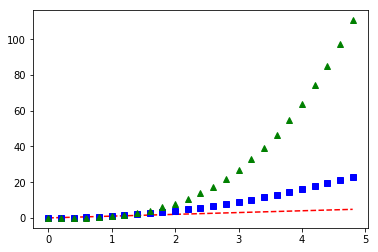

In [51]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs

#plt.plot(x, regr.predict(x), color='blue', linewidth=3)
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [48]:
len(x) == len(y)

True